In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/DataPreprocessing.csv")
data

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes
5,India,40.0,69600.0,Yes
6,Brazil,NaN,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


In [ ]:
data.shape

(10, 4)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          10 non-null     object 
 1   Age             9 non-null      float64
 2   Income          9 non-null      float64
 3   Online Shopper  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [ ]:
data.isnull()

,Region,Age,Income,Online Shopper
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,True,False
5,False,False,False,False
6,False,True,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [ ]:
data.fillna("45.0",inplace=True)

In [ ]:
data.isnull()

,Region,Age,Income,Online Shopper
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [ ]:
data.isna().sum()

Region            0
Age               0
Income            0
Online Shopper    0
dtype: int64

In [ ]:
data['Online Shopper'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
data.describe()

,Region,Age,Income,Online Shopper
count,10,10.0,10.0,10
unique,3,10.0,10.0,2
top,India,49.0,86400.0,No
freq,4,1.0,1.0,5


In [ ]:
# freqgraph=data.select_dtypes(include=['int32','int64','float'])
# freqgraph.hist(figsize=(20,15))
# plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


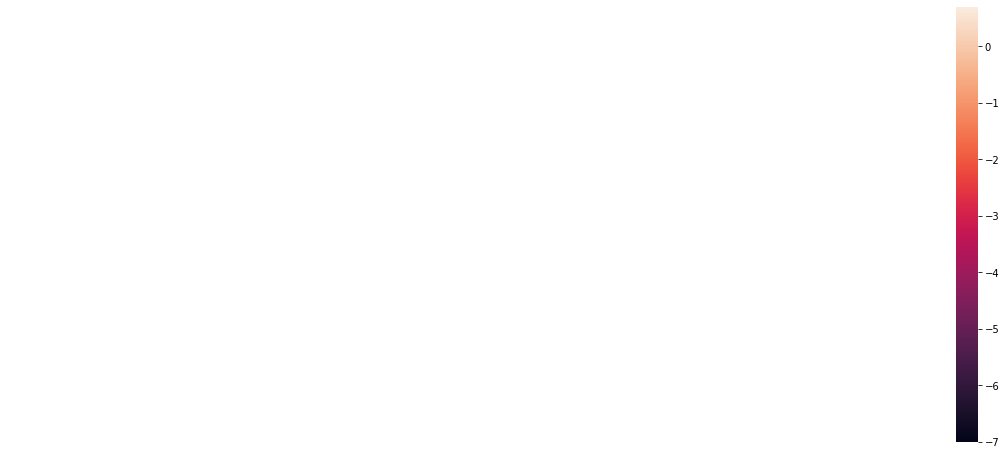

In [ ]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-7,vmax=0.7,annot=True,linewidths=0.2)

In [ ]:
data.columns

Index(['Region', 'Age', 'Income', 'Online Shopper'], dtype='object')

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data1['Online Shopper']= label_encoder.fit_transform(data1['Online Shopper'])
data1['Online Shopper'].unique()

array([0, 1])

In [ ]:
y=data1['Online Shopper']
x=data1.drop(['Online Shopper'],axis=1)

In [ ]:
y

0    0
1    1
2    0
3    0
4    1
5    1
6    0
7    1
8    0
9    1
Name: Online Shopper, dtype: int64

In [ ]:
x

,Age,Income
0,49.0,86400.0
1,32.0,57600.0
2,35.0,64800.0
3,43.0,73200.0
4,45.0,12345
5,40.0,69600.0
6,12345,62400.0
7,53.0,94800.0
8,55.0,99600.0
9,42.0,80400.0


In [ ]:
x.shape

(10, 2)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

In [ ]:
model=lr.fit(x_train,y_train)

In [ ]:
predictions=model.predict(x_test)

In [ ]:
print(y_test)

8    0
1    1
5    1
Name: Online Shopper, dtype: int64


In [ ]:
print(predictions)

[0 0 0]


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,predictions))

MSE is: 0.6666666666666666
